# Answers to ISLR - Chapter 4


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from itertools import combinations
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Applied


10. This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
- (a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?
- (b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?
- (c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.
- (d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).
- (e) Repeat (d) using LDA.
- (f) Repeat (d) using QDA.
- (g) Repeat (d) using KNN with K = 1.
- (h) Which of these methods appears to provide the best results on
this data?
- (i) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [2]:
# a.
weekly = pd.read_csv('./data/weekly.csv')

In [3]:
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [7]:
weekly['Direction']=weekly.Direction.apply(lambda x: 0 if x=='Down' else  1)

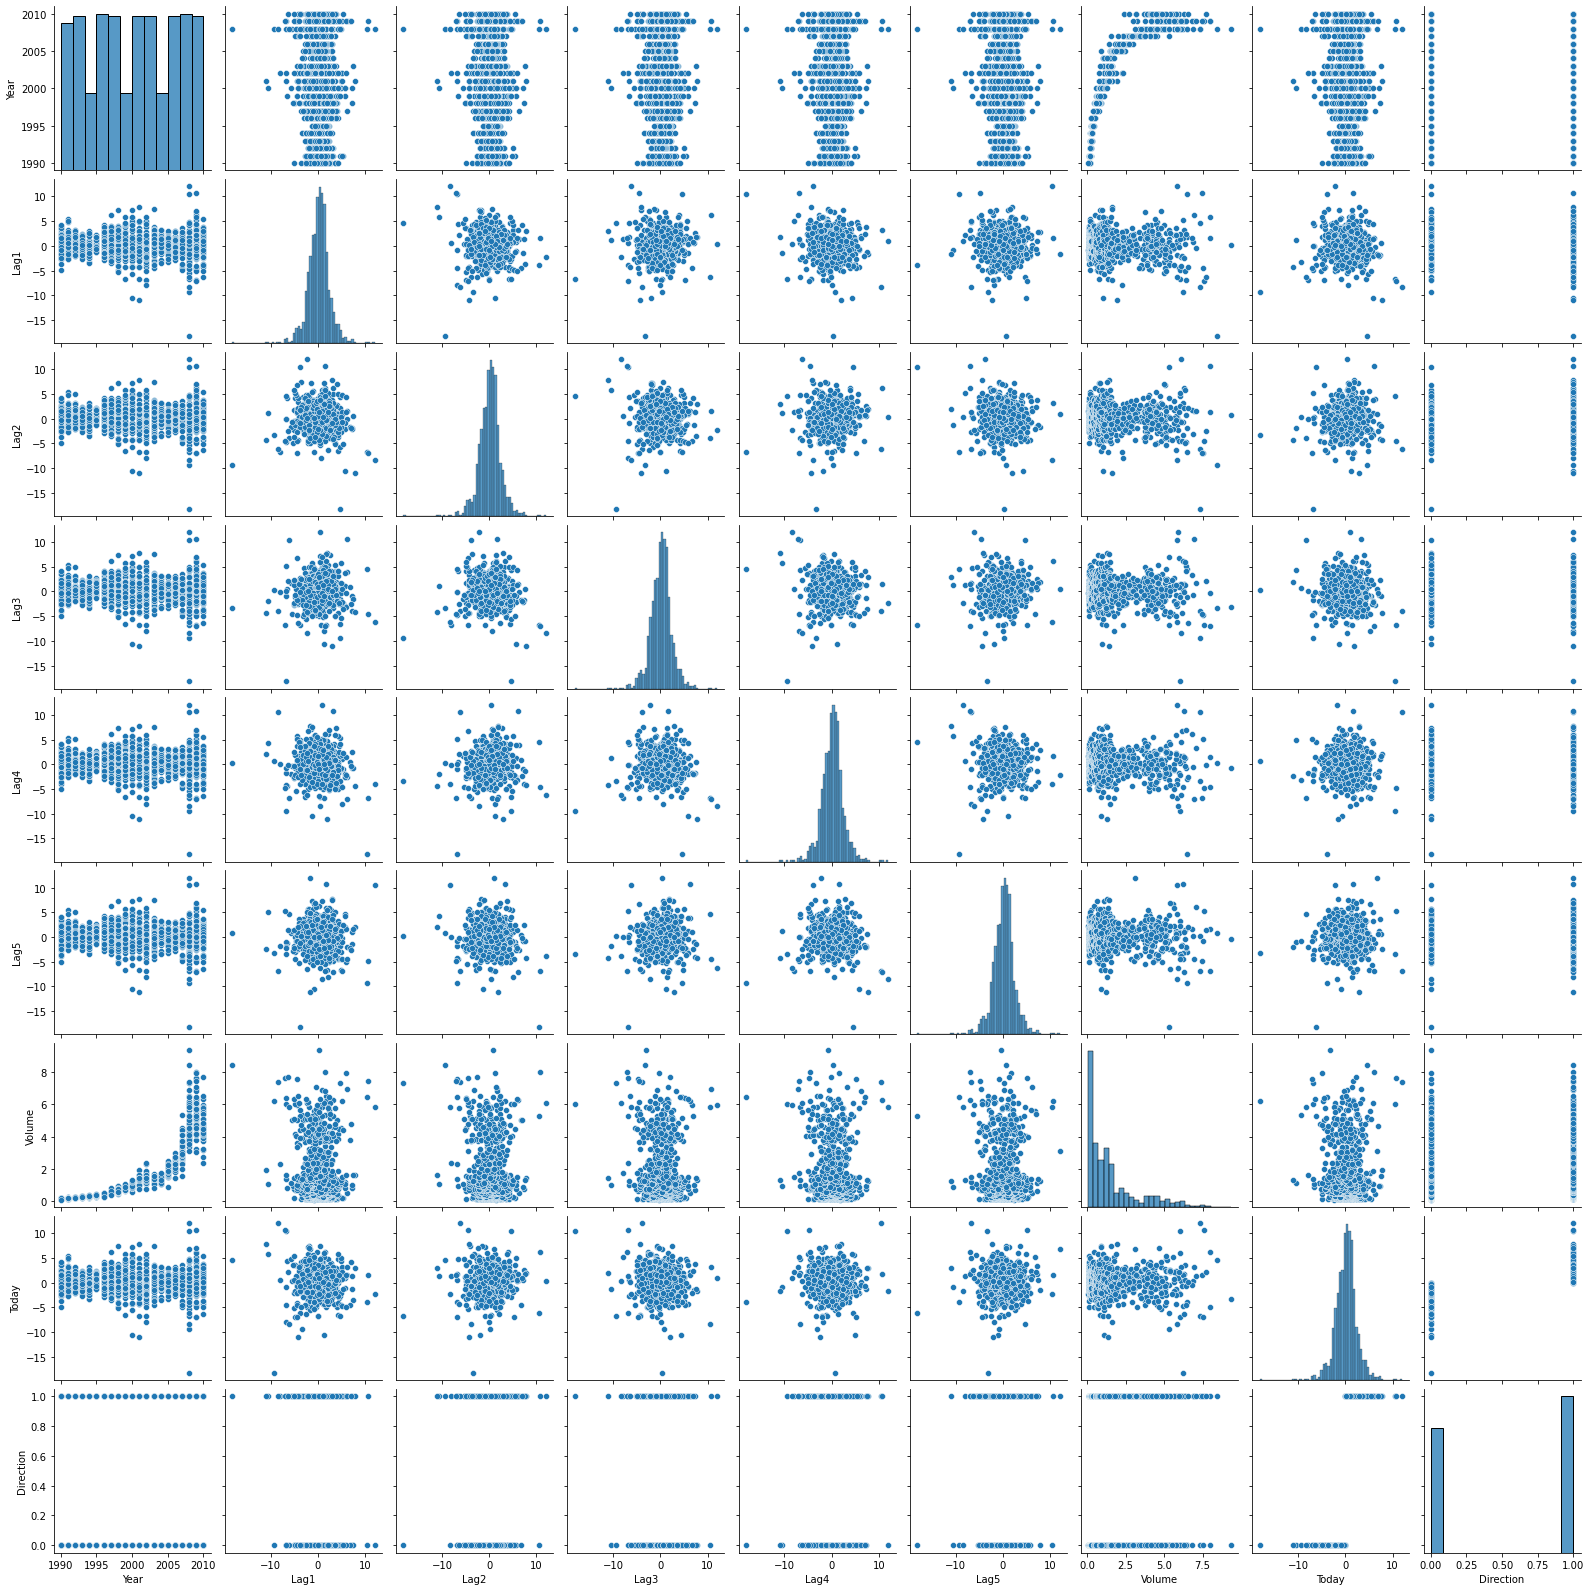

In [8]:
sns.pairplot(weekly)

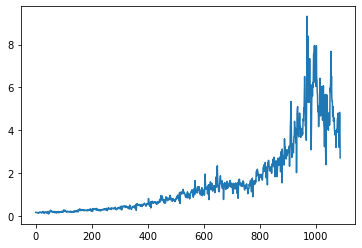

In [27]:
plt.plot(weekly.Volume)

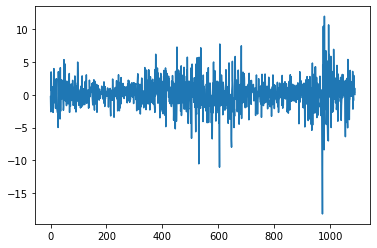

In [30]:
plt.plot(weekly.Today)

It can be seen in the graph that there is a strong correlation btw Volumne and year (Exponential). Also there is more stable momeent along the time, like in 2008 where the today value is more spread along the y axe.

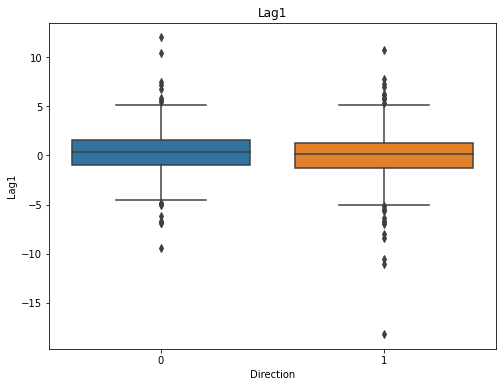

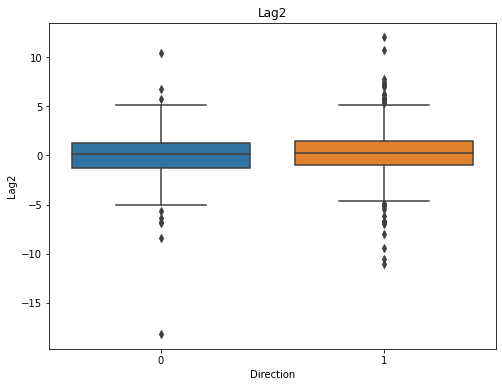

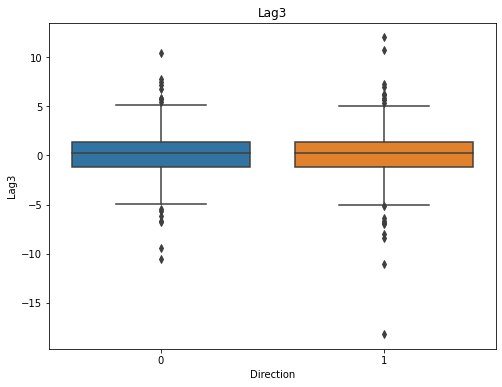

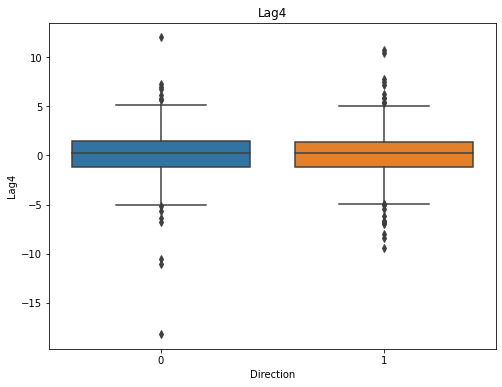

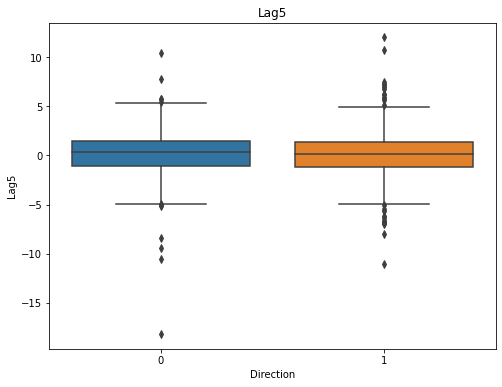

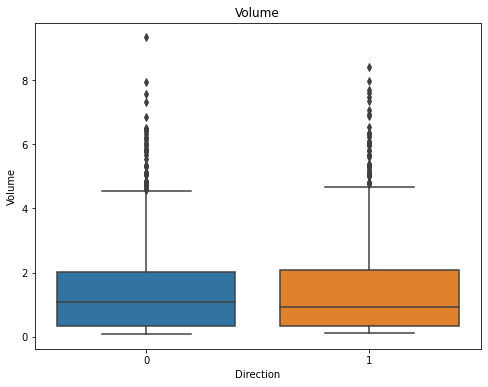

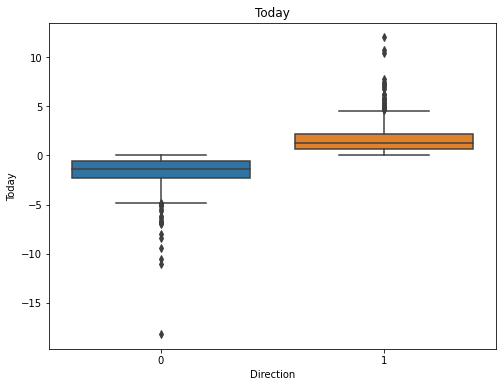

In [37]:
for col in weekly.columns[1:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=weekly.Direction,y=weekly[col])
    plt.title(col)
    plt.show()

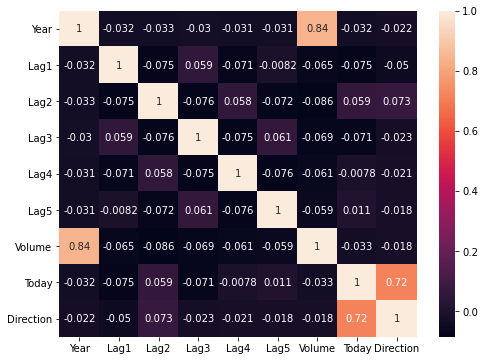

In [11]:
corr_mat = weekly.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True)
plt.show()

In this matrix we confirm the correlation btw volume and year, but also helped a lot to see the correlation btw Today and Year (it was clear in the scatter plot, but I did not see it)

In [21]:
#b.
results = smf.logit('Direction ~ ' + ' + '.join(weekly.columns[0:-2]),data=weekly).fit()

Optimization terminated successfully.
         Current function value: 0.682349
         Iterations 5


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1081
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Apr 2021   Pseudo R-squ.:                0.006714
Time:                        09:27:28   Log-Likelihood:                -743.08
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1860
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2258     37.891      0.455      0.649     -57.038      91.490
Year          -0.0085      0.019     -0.448      0.654      -0.046       0.029
Lag1          -0.0407      0.026     -1.538      0.124      -0.093       0.011
Lag2           0.0594      0.027      2.204      0.028       0.007       0.112
Lag3          -0.0155      0.027     -0.580      0.562      -0.068       0.037
Lag4          -0.0273      0.026     -1.031      0.302      -0.079       0.025
Lag5          -0.0140      0.026     -0.531      0.595      -0.066       0.038
Volume         0.0033      0.069      0.047      0.962      -0.132       0.138
==============================================================================
"""

There is an important statistical relationship btw Lag2 and Direction!!

In [48]:
X = weekly.iloc[:,0:-2]
y = weekly.loc[:,'Direction']

In [90]:
# Scikit lean way


lr = LogisticRegression()
lr.fit(X,y)
print('Accuracy of the method:',lr.score(X,y))

Accuracy of the method: 0.5601469237832875


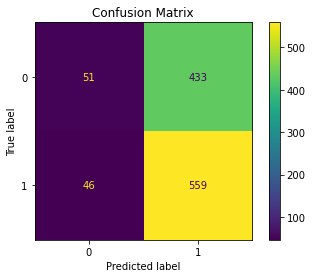

In [87]:
# c.
metrics.plot_confusion_matrix(lr,X,y)
plt.title('Confusion Matrix')
plt.show()

The accuracy of the method is 56%, what is bad!! Because a naive method that always predict Up in the market will have an accuracy if 55% (46+559)/1089. Seeing the Confusion matrix we realized that the mistakes are when the method try to predict a down in a market. It predict an amounr of 433 False positive 'UPs


Accuracy of the method: 0.625


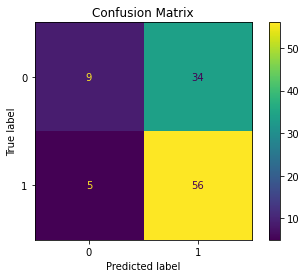

In [149]:
#d.
# Model with only Lag2 btw 1990 a 2008
X_1 = weekly[weekly.Year<=2008].Lag2.values
X_1 = X_1.reshape(-1,1)
X_test = weekly[weekly.Year>2008].Lag2.values
X_test = X_test.reshape(-1,1)
y_1 = weekly[weekly.Year<=2008].Direction
y_test = weekly[weekly.Year>2008].Direction
lr_1 = LogisticRegression()
lr_1.fit(X_1,y_1)
print('Accuracy of the method:',metrics.accuracy_score(y_test,lr_1.predict(X_test)))
metrics.plot_confusion_matrix(lr_1,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()

The problem remain simmilar than before. That means, good prediction for the true Ups but really bad for the Downs.

Accuracy of the method: 0.625


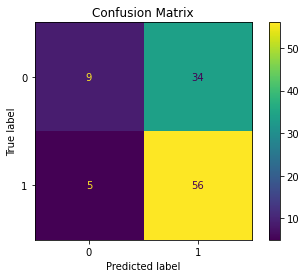

In [104]:
# e.
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_1,y_1)
print('Accuracy of the method:',metrics.accuracy_score(y_test,lda.predict(X_test)))
metrics.plot_confusion_matrix(lda,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()


Exaclty Same values as Linera Regression

Accuracy of the method: 0.5865384615384616


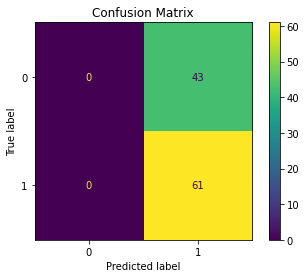

In [106]:
# f.
# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_1,y_1)
print('Accuracy of the method:',metrics.accuracy_score(y_test,qda.predict(X_test)))
metrics.plot_confusion_matrix(qda,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()

It is a really bad prediction because it is not predicting Downs.

Accuracy of the method: 0.5


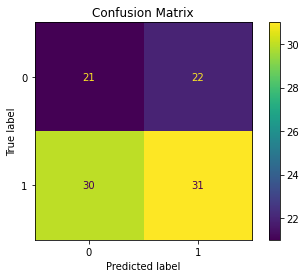

In [110]:
# g. KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_1,y_1)
print('Accuracy of the method:',metrics.accuracy_score(y_test,knn.predict(X_test)))
metrics.plot_confusion_matrix(knn,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()

The method is really bad as well

h. The best method is the Logistic Regression and LDA for this data!

In [151]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
X=weekly[weekly.Year<=2008].Lag2.values
X = X.reshape(-1,1)
X=std.fit_transform(X)
X

array([[ 6.36786735e-01],
       [ 3.03441257e-01],
       [-1.75412169e-01],
       [-1.19220407e+00],
       [ 1.49307896e+00],
       [ 2.57584207e-01],
       [ 4.63059065e-01],
       [-6.61320526e-01],
       [ 2.99472858e-01],
       [-3.82819524e-02],
       [ 4.96129053e-01],
       [-1.23717925e+00],
       [-8.46953392e-01],
       [ 1.18707134e+00],
       [ 1.71707301e+00],
       [ 2.74339667e-01],
       [-6.38560764e-02],
       [ 1.01069807e+00],
       [-5.96503349e-01],
       [ 4.59972533e-01],
       [-9.65123482e-01],
       [ 2.65080071e-01],
       [-6.97569709e-03],
       [ 1.03715406e+00],
       [-7.40688497e-01],
       [-1.05242825e+00],
       [-1.12694596e+00],
       [-1.25040724e+00],
       [-1.06697904e+00],
       [-2.25132555e+00],
       [ 1.50762975e+00],
       [ 5.82824125e-02],
       [-9.52336420e-01],
       [-8.23143000e-01],
       [-8.02860074e-01],
       [ 7.28941769e-01],
       [-1.67987616e+00],
       [ 1.77351246e+00],
       [-1.1

Accuracy in the method 0.5543147208121827
Accuracy of the testdata: 0.625


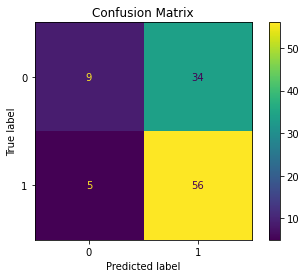

In [152]:
# i.
X_test = weekly[weekly.Year>2008].Lag2.values
X_test = X_test.reshape(-1,1)
X_test = std.transform(X_test)
y_1 = weekly[weekly.Year<=2008].Direction
y_test = weekly[weekly.Year>2008].Direction

lda = LinearDiscriminantAnalysis()
lda.fit(X,y_1)
print('Accuracy in the method',metrics.accuracy_score(y_1, lda.predict(X)))
print('Accuracy of the testdata:',metrics.accuracy_score(y_test,lda.predict(X_test)))
metrics.plot_confusion_matrix(lda,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()

This means that Lag2 values has a gaussian form by themself.

Accuracy in the method 0.5634517766497462
Accuracy in the test data: 0.4519230769230769


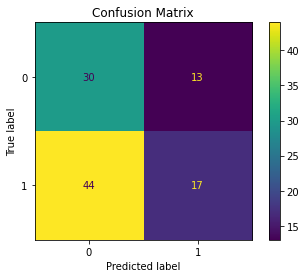

In [147]:
X=weekly[weekly.Year<=2008].iloc[:,0:-2].values
X=std.fit_transform(X)

X_test = weekly[weekly.Year>2008].iloc[:,0:-2].values
X_test = std.transform(X_test)

y_1 = weekly[weekly.Year<=2008].Direction
y_test = weekly[weekly.Year>2008].Direction

lda = LinearDiscriminantAnalysis()
lda.fit(X,y_1)
print('Accuracy in the method',metrics.accuracy_score(y_1, lda.predict(X)))
print('Accuracy in the test data:',metrics.accuracy_score(y_test,lda.predict(X_test)))

metrics.plot_confusion_matrix(lda,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()

If we use all the predictors the results are worse

***
11. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.
- (a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.
- (b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.
- (c) Split the data into a training set and a test set.
- (d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?
- (e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?
- (f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?
- (g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [2]:
# a.
uto = pd.read_csv('./data/auto.csv')

In [3]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
median_mpg = auto.mpg.median()
median_mpg

22.75

In [7]:
auto['mpg01'] = auto.mpg.apply(lambda x: 1 if x >= median_mpg else 0)

In [8]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


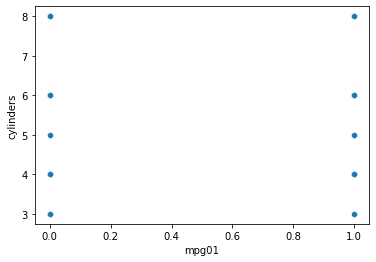

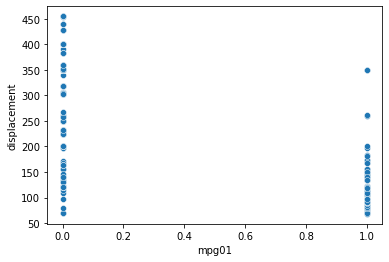

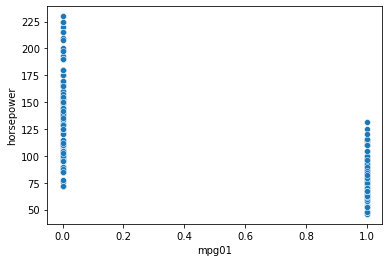

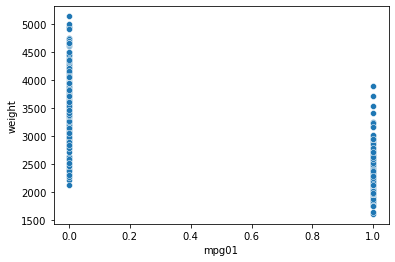

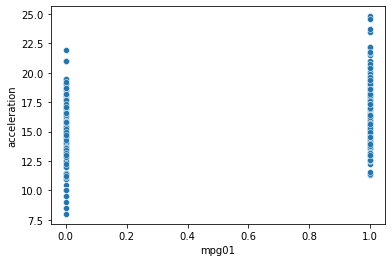

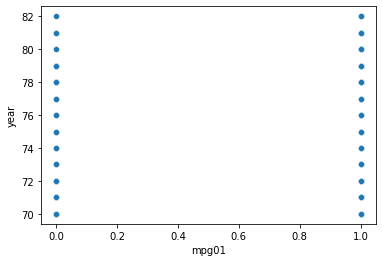

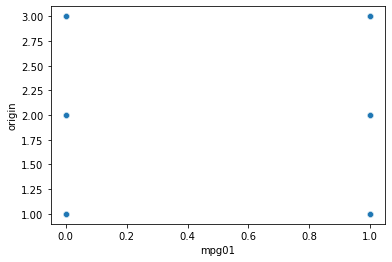

In [11]:
# b.
for col in auto.columns[1:-2]:
    sns.scatterplot(y=auto[col],x=auto.mpg01)
    plt.show()

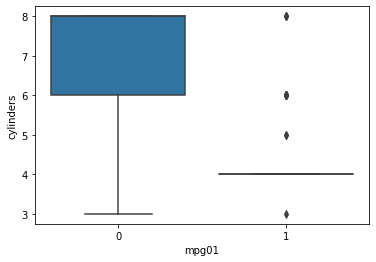

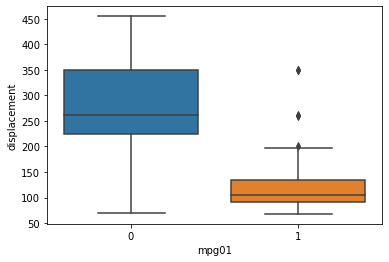

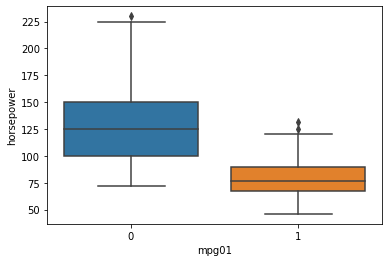

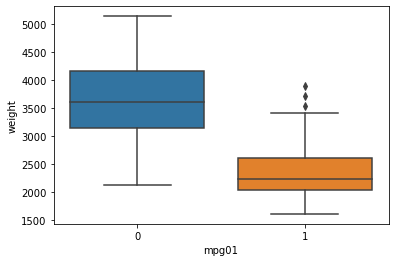

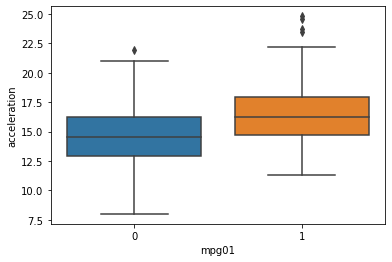

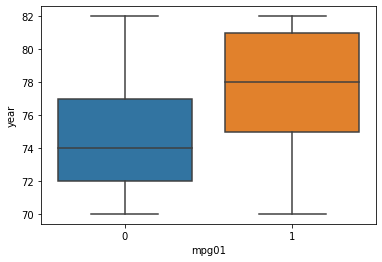

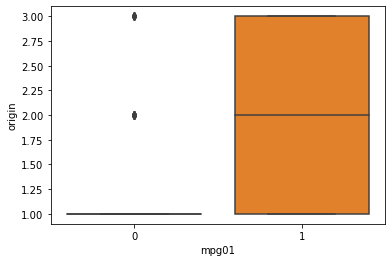

In [13]:
for col in auto.columns[1:-2]:
    sns.boxplot(y=auto[col],x=auto.mpg01)
    plt.show()

For this variable (mpg01) the boxplots are much useful, we can se that the millage per galon is higher when we have:
- less cylinders (not much correlation) - exclude
- less displacement
- less horsepower
- less weight
- more aceleration
- newers cars

there is no correlation with origin.

We need to remeber that there is a correlation btw displacement horsepower and weight so we can only use one of them. Aceleration a year are also really usefuls for our task.

In [58]:
# c
X = auto.loc[:,['displacement','horsepower','weight','acceleration','year']]
y = auto.mpg01

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [59]:
# d
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,lda.predict(X_train)))
print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,lda.predict(X_test)))

Accuracy in the train dataset: 0.8809523809523809
Accuracy in the test dataset: 0.9183673469387755


In [55]:
# e
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,qda.predict(X_train)))
print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,qda.predict(X_test)))

Accuracy in the train dataset: 0.9081632653061225
Accuracy in the test dataset: 0.8979591836734694


In [29]:
# f
logre = LogisticRegression()
logre.fit(X_train,y_train)
print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,logre.predict(X_train)))
print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,logre.predict(X_test)))

Accuracy in the train dataset: 0.8809523809523809
Accuracy in the test dataset: 0.9795918367346939


Best method for this predictors and this train test split (we'll see in the next chapter the concept of cross val score!!)

In [38]:
# d
knn= KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,knn.predict(X_train)))
print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,knn.predict(X_test)))

Accuracy in the train dataset: 0.8673469387755102
Accuracy in the test dataset: 0.9183673469387755


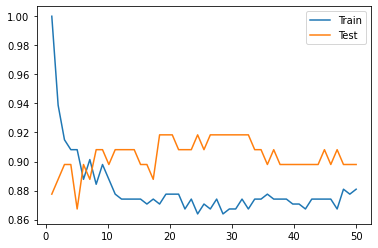

In [52]:
scores_train = []
scores_test = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score_test = metrics.accuracy_score(y_test,knn.predict(X_test))
    score_train = metrics.accuracy_score(y_train,knn.predict(X_train))
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    

plt.plot(np.linspace(1,50,49), scores_train,label='Train')
plt.plot(np.linspace(1,50,49), scores_test, label ='Test')
plt.legend()
plt.show()

The best K for this method is k=20. but the behaviour is strange (Relatied with the train_test_split's seed). With neighbors close to 1, the model fit perfect for the train set, but it's a typical case of overfitting (low bias - high variance)

***
12. This problem involves writing functions.
- (a) Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.
Hint: Recall that x^a raises x to the power a. Use the print()
function to output the result.
- (b) Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x^a. You can
do this by beginning your function with the line
 Power2 =function (x,a){
You should be able to call your function by entering, for instance,
Power2 (3,8)
on the command line. This should output the value of 38, namely,
6, 561.
- (c) Using the Power2() function that you just wrote, compute 103,
817, and 1313.
- (d) Now create a new function, Power3(), that actually returns the
result x^a as an R object, rather than simply printing it to the
screen. That is, if you store the value x^a in an object called
result within your function, then you can simply return() this
return()
result, using the following line:
The line above should be the last line in your function, before
the } symbol.
- (e) Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using log=‘‘x’’, log=‘‘y’’, or log=‘‘xy’’ as arguments to
the plot() function.
- (f) Create a function, PlotPower(), that allows you to create a plot
of x against x^a for a fixed a and for a range of values of x. For
instance, if you call
PlotPower (1:10 ,3)
then a plot should be created with an x-axis taking on values
1, 2, . . . , 10, and a y-axis taking on values 13, 23, . . . , 103.

In [16]:
def power(num1,num2):
    res = num1**num2
    return res



<ipython-input-27-ad6d802d2f56>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


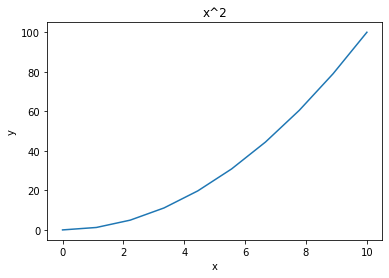

<ipython-input-27-ad6d802d2f56>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


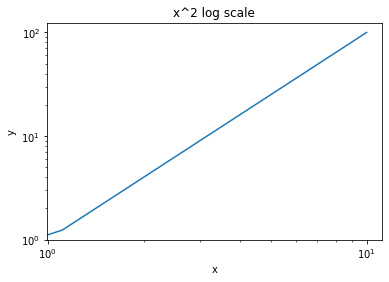

In [27]:
x = np.linspace(0,10,10)
plt.plot(x,power(x,2))
plt.title('x^2')
plt.xlabel('x')
plt.ylabel('y')

plt.axes()
plt.show()

plt.plot(x,power(x,2))
plt.title('x^2 log scale')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.xscale('log')
plt.axes()
plt.show()

In [50]:
# f
def plot_power(rang1,rang2,pot):
    x = np.linspace(rang1,rang2,rang2-rang1)
    y= power(x,pot)
    plt.plot(x,y)
    plt.title('x ^'+ str(pot))
    plt.xlabel('x')
    plt.ylabel('y')
    print(pot)
    plt.axes()
    plt.show()

5


<ipython-input-50-13a995b94779>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


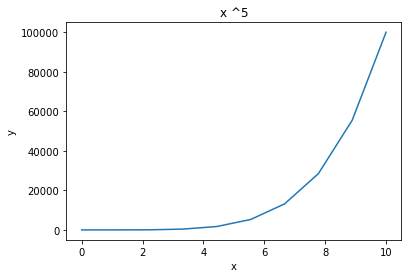

In [51]:
plot_power(0,10,5,)

***
13. Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

In [52]:
boston = pd.read_csv('./data/boston.csv')

In [54]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [58]:
crim_med = boston.crim.median()
boston['crim01']=boston.crim.apply(lambda x: 1 if x>=crim_med else 0)

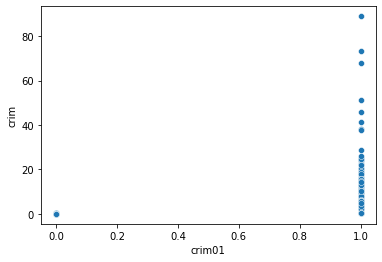

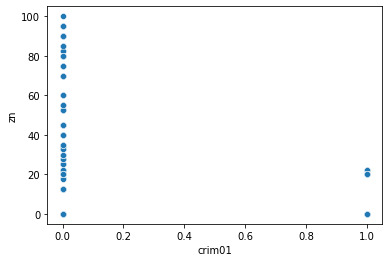

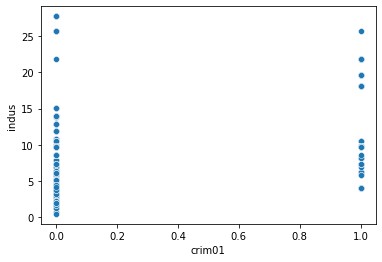

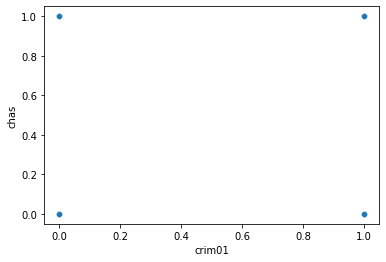

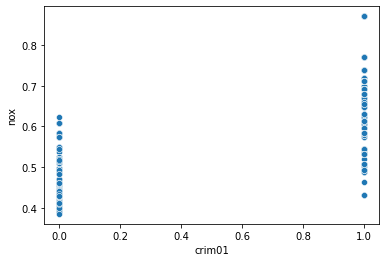

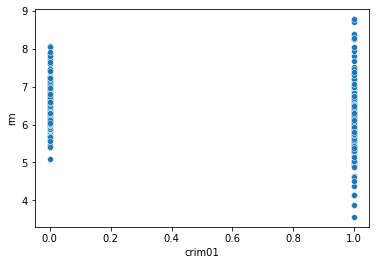

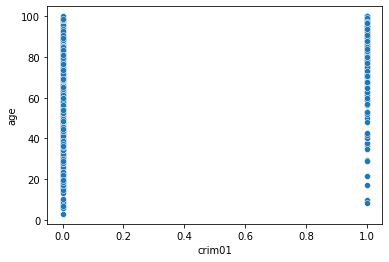

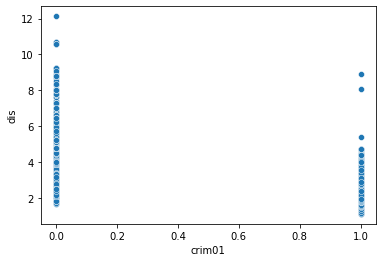

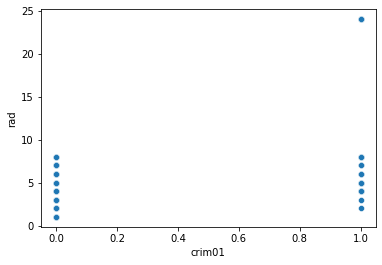

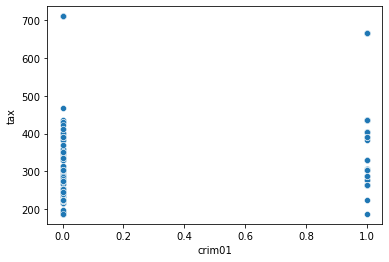

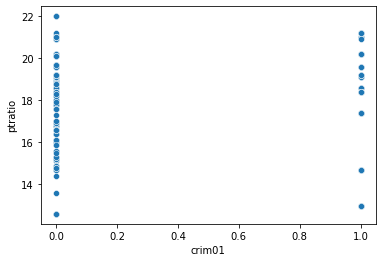

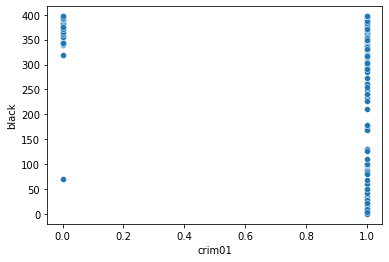

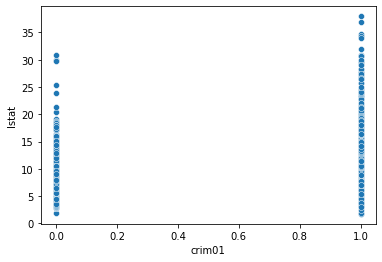

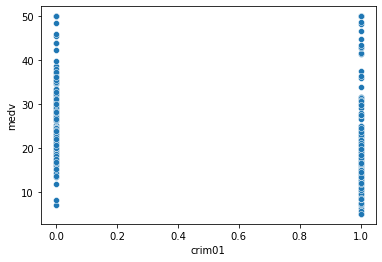

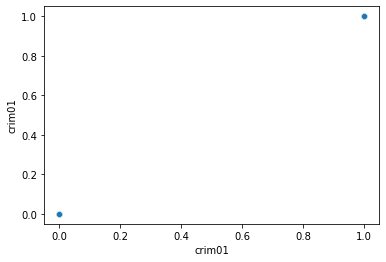

In [72]:
for col in boston.columns:
    sns.scatterplot(x=boston.crim01, y = boston[col])
    plt.show()

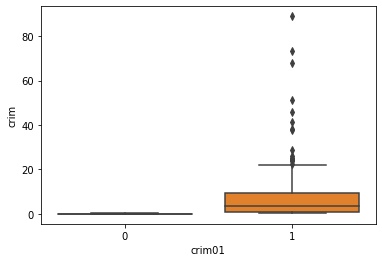

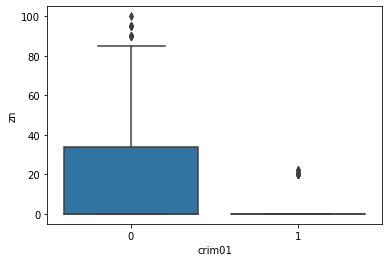

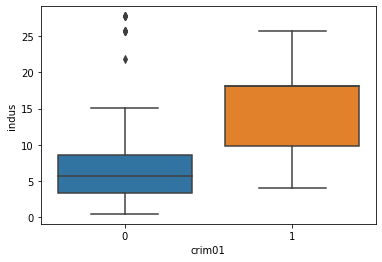

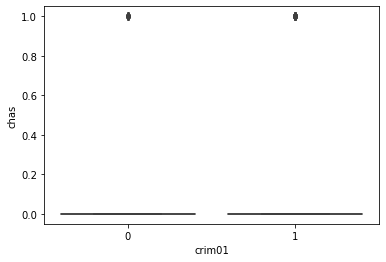

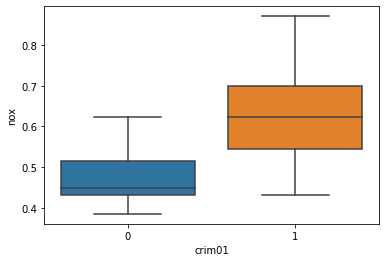

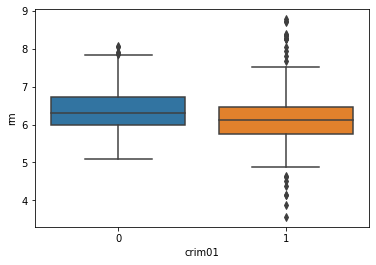

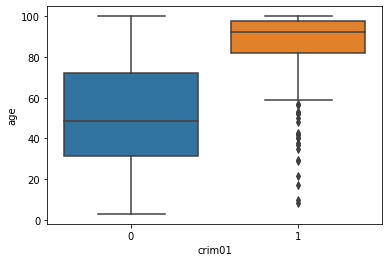

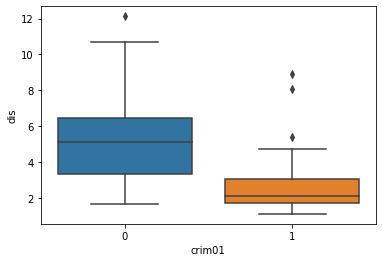

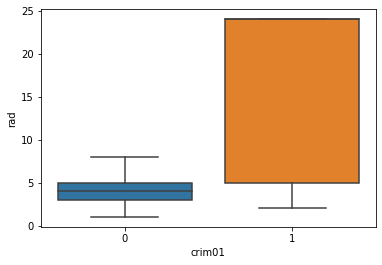

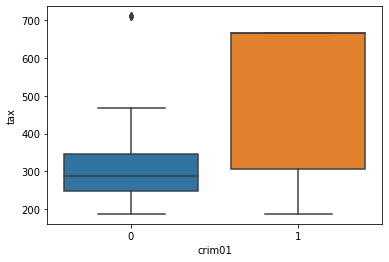

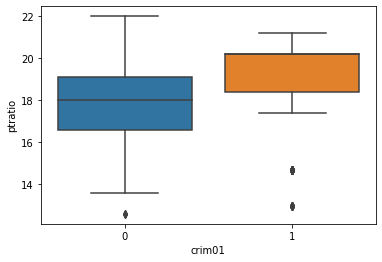

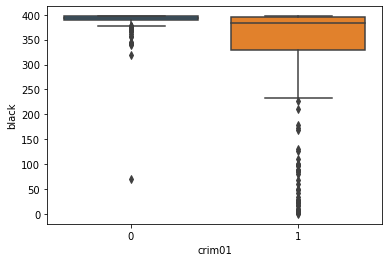

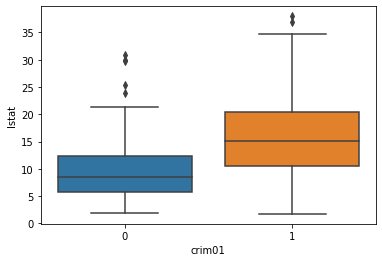

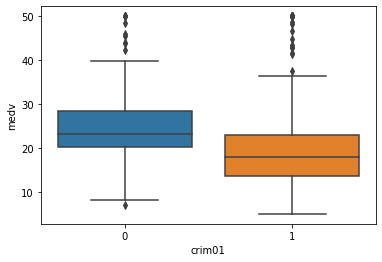

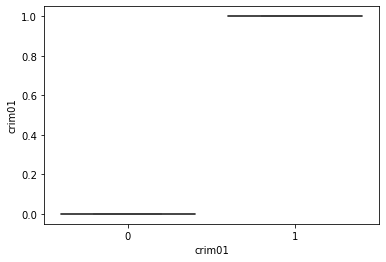

In [73]:
for col in boston.columns:
    sns.boxplot(x=boston.crim01, y = boston[col])
    plt.show()

In [98]:
# Model report!
def models_report(X,y):


    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    print('Report\n')

    print('LDA')
    print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,lda.predict(X_train)))
    print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,lda.predict(X_test)))


    print('QDA')
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train,y_train)
    print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,qda.predict(X_train)))
    print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,qda.predict(X_test)))

    print('LR')
    logre = LogisticRegression(max_iter=100000)
    logre.fit(X_train,y_train)
    print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,logre.predict(X_train)))
    print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,logre.predict(X_test)))

    print('KNN')
    knn= KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train,y_train)
    print('Accuracy in the train dataset:',metrics.accuracy_score(y_train,knn.predict(X_train)))
    print('Accuracy in the test dataset:',metrics.accuracy_score(y_test,knn.predict(X_test)))

In [99]:
# All the features
X = boston.iloc[:,1:-1]
y = boston.crim01

models_report(X,y)

# best is QDA

Report

LDA
Accuracy in the train dataset: 0.8654353562005277
Accuracy in the test dataset: 0.8582677165354331
QDA
Accuracy in the train dataset: 0.9076517150395779
Accuracy in the test dataset: 0.905511811023622
LR
Accuracy in the train dataset: 0.8601583113456465
Accuracy in the test dataset: 0.8740157480314961
KNN
Accuracy in the train dataset: 0.8759894459102903
Accuracy in the test dataset: 0.8188976377952756


In [102]:
# with the features with more correlation
featu = ['indus','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']
X = boston.loc[:,featu]
y = boston.crim01

models_report(X,y)

# Again QDA is the best (that could indicate that the real relationship is not linear at all)

Report

LDA
Accuracy in the train dataset: 0.8548812664907651
Accuracy in the test dataset: 0.8582677165354331
QDA
Accuracy in the train dataset: 0.8918205804749341
Accuracy in the test dataset: 0.9212598425196851
LR
Accuracy in the train dataset: 0.8443271767810027
Accuracy in the test dataset: 0.8267716535433071
KNN
Accuracy in the train dataset: 0.8812664907651715
Accuracy in the test dataset: 0.8503937007874016


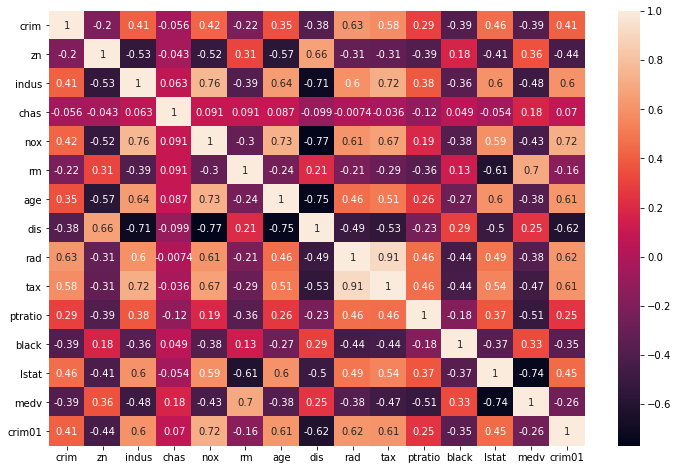

In [104]:
corr_mat = boston.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True)
plt.show()

Crim01 has high correlation with (>0.5)
- indus
- nox
- age
- dis
- rad
- tax

but
- tax and rad are corelated (colinearity) so we keep 1 (rad 1 more point of corr)


In [106]:
# with the features with more correlation
featu = ['indus','nox','age','dis','rad']
X = boston.loc[:,featu]
y = boston.crim01

models_report(X,y)

# Worst Result - conclusion even if some variables has lower correlaiton they also have sometimes importan information
# to predict the response. In addition, QDA is still the best method for this dataset.

Report

LDA
Accuracy in the train dataset: 0.8575197889182058
Accuracy in the test dataset: 0.8267716535433071
QDA
Accuracy in the train dataset: 0.8707124010554089
Accuracy in the test dataset: 0.8582677165354331
LR
Accuracy in the train dataset: 0.8469656992084432
Accuracy in the test dataset: 0.8031496062992126
KNN
Accuracy in the train dataset: 0.8337730870712401
Accuracy in the test dataset: 0.8346456692913385
